# This is my first time trying out to finetune a model. Took the reference of kaggle notebook 'https://www.kaggle.com/code/themosesab/finetuning-yolov12-comic-panel-detection'.
# Labeled comic pages using roboflow . Tried  variety of samples (blur, long shots, image with other background, rotated images)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6635.8/8062.4 GB disk)


In [4]:
import torch

DEVICE = "cpu"

print("CUDA available : ", torch.cuda.is_available())

if torch.cuda.is_available():
    print("Current device :" , torch.cuda.current_device())
    print("Device_name ", torch.cuda.get_device_name(0))
    Device = torch.cuda.current_device()

CUDA available :  True
Current device : 0
Device_name  Tesla T4


In [2]:
%pip install opencv-python matplotlib numpy pyyaml pillow requests pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO
# 'yolov12x.pt' is the largest version of YOLOv12
model = YOLO("yolo12x.pt")
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

try:
    rf = Roboflow(api_key="riVHqvl7SFSivKP1YsfP")
    project = rf.workspace("machinelearningpractice").project("my-first-project-gctd1")
    version = project.version(2)
    dataset = version.download("yolov12")
except Exception as e:
    print(f"Failed to download the dataset: {e}")

%cd {HOME}

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2 in yolov12:: 100%|██████████| 126/126 [00:00<00:00, 8616.75it/s]

/kaggle/working


In [8]:
for root, dirs, files in os.walk(os.path.join(os.getcwd())):
    print(f'Found folder: {root} with {len(files)} files')

Found folder: /kaggle/working with 1 files
Found folder: /kaggle/working/.virtual_documents with 1 files
Found folder: /kaggle/working/datasets with 0 files
Found folder: /kaggle/working/datasets/My-First-Project-2 with 3 files
Found folder: /kaggle/working/datasets/My-First-Project-2/valid with 0 files
Found folder: /kaggle/working/datasets/My-First-Project-2/valid/labels with 13 files
Found folder: /kaggle/working/datasets/My-First-Project-2/valid/images with 13 files
Found folder: /kaggle/working/datasets/My-First-Project-2/test with 0 files
Found folder: /kaggle/working/datasets/My-First-Project-2/test/labels with 3 files
Found folder: /kaggle/working/datasets/My-First-Project-2/test/images with 3 files
Found folder: /kaggle/working/datasets/My-First-Project-2/train with 0 files
Found folder: /kaggle/working/datasets/My-First-Project-2/train/labels with 41 files
Found folder: /kaggle/working/datasets/My-First-Project-2/train/images with 41 files


In [9]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, batch=16, val=True, project='ComicPanelUsingYOLO', name='finetuning', 
                          save=True, device=[0, 1], cache=True, plots=True, exist_ok=True)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
                                                      CUDA:1 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/datasets/My-First-Project-2/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=finetuning,

In [11]:
import pandas as pd

# result sof fine tuning
df = pd.read_csv('/kaggle/working/runs/detect/ComicPanelUsingYOLO/finetuning/results.csv')
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,21.0667,1.98106,2.89936,2.29833,0.24724,0.15217,0.12858,0.05417,1.65800,2.76484,1.91572,0.000040,0.000040,0.000040
1,2,25.4528,1.76989,2.94622,2.26376,0.17658,0.19565,0.12907,0.04532,1.74806,2.79682,1.99528,0.000099,0.000099,0.000099
2,3,29.8685,1.40923,2.02581,1.77364,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,0.000157,0.000157,0.000157
3,4,35.1194,1.35686,1.49678,1.59496,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,0.000213,0.000213,0.000213
4,5,40.3513,1.30547,1.55841,1.65702,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,0.000269,0.000269,0.000269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,522.0200,0.54226,0.46465,1.12922,0.82791,0.84783,0.80309,0.62024,0.92128,0.88312,1.40913,0.000119,0.000119,0.000119
96,97,527.2280,0.56201,0.49167,1.15264,0.82791,0.84783,0.80309,0.62024,0.92128,0.88312,1.40913,0.000099,0.000099,0.000099
97,98,532.3840,0.63812,0.58579,1.12148,0.84704,0.84783,0.80853,0.61932,0.91419,0.86428,1.39371,0.000079,0.000079,0.000079
98,99,537.5800,0.51391,0.39093,1.07925,0.82592,0.84783,0.80728,0.61353,0.91476,0.86684,1.39092,0.000060,0.000060,0.000060


In [12]:
!ls /kaggle/working/runs/detect/ComicPanelUsingYOLO/finetuning

args.yaml			 labels.jpg	     train_batch272.jpg
BoxF1_curve.png			 results.csv	     train_batch2.jpg
BoxP_curve.png			 results.png	     val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg    val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg    weights
confusion_matrix_normalized.png  train_batch270.jpg
confusion_matrix.png		 train_batch271.jpg


Validation Labels: 


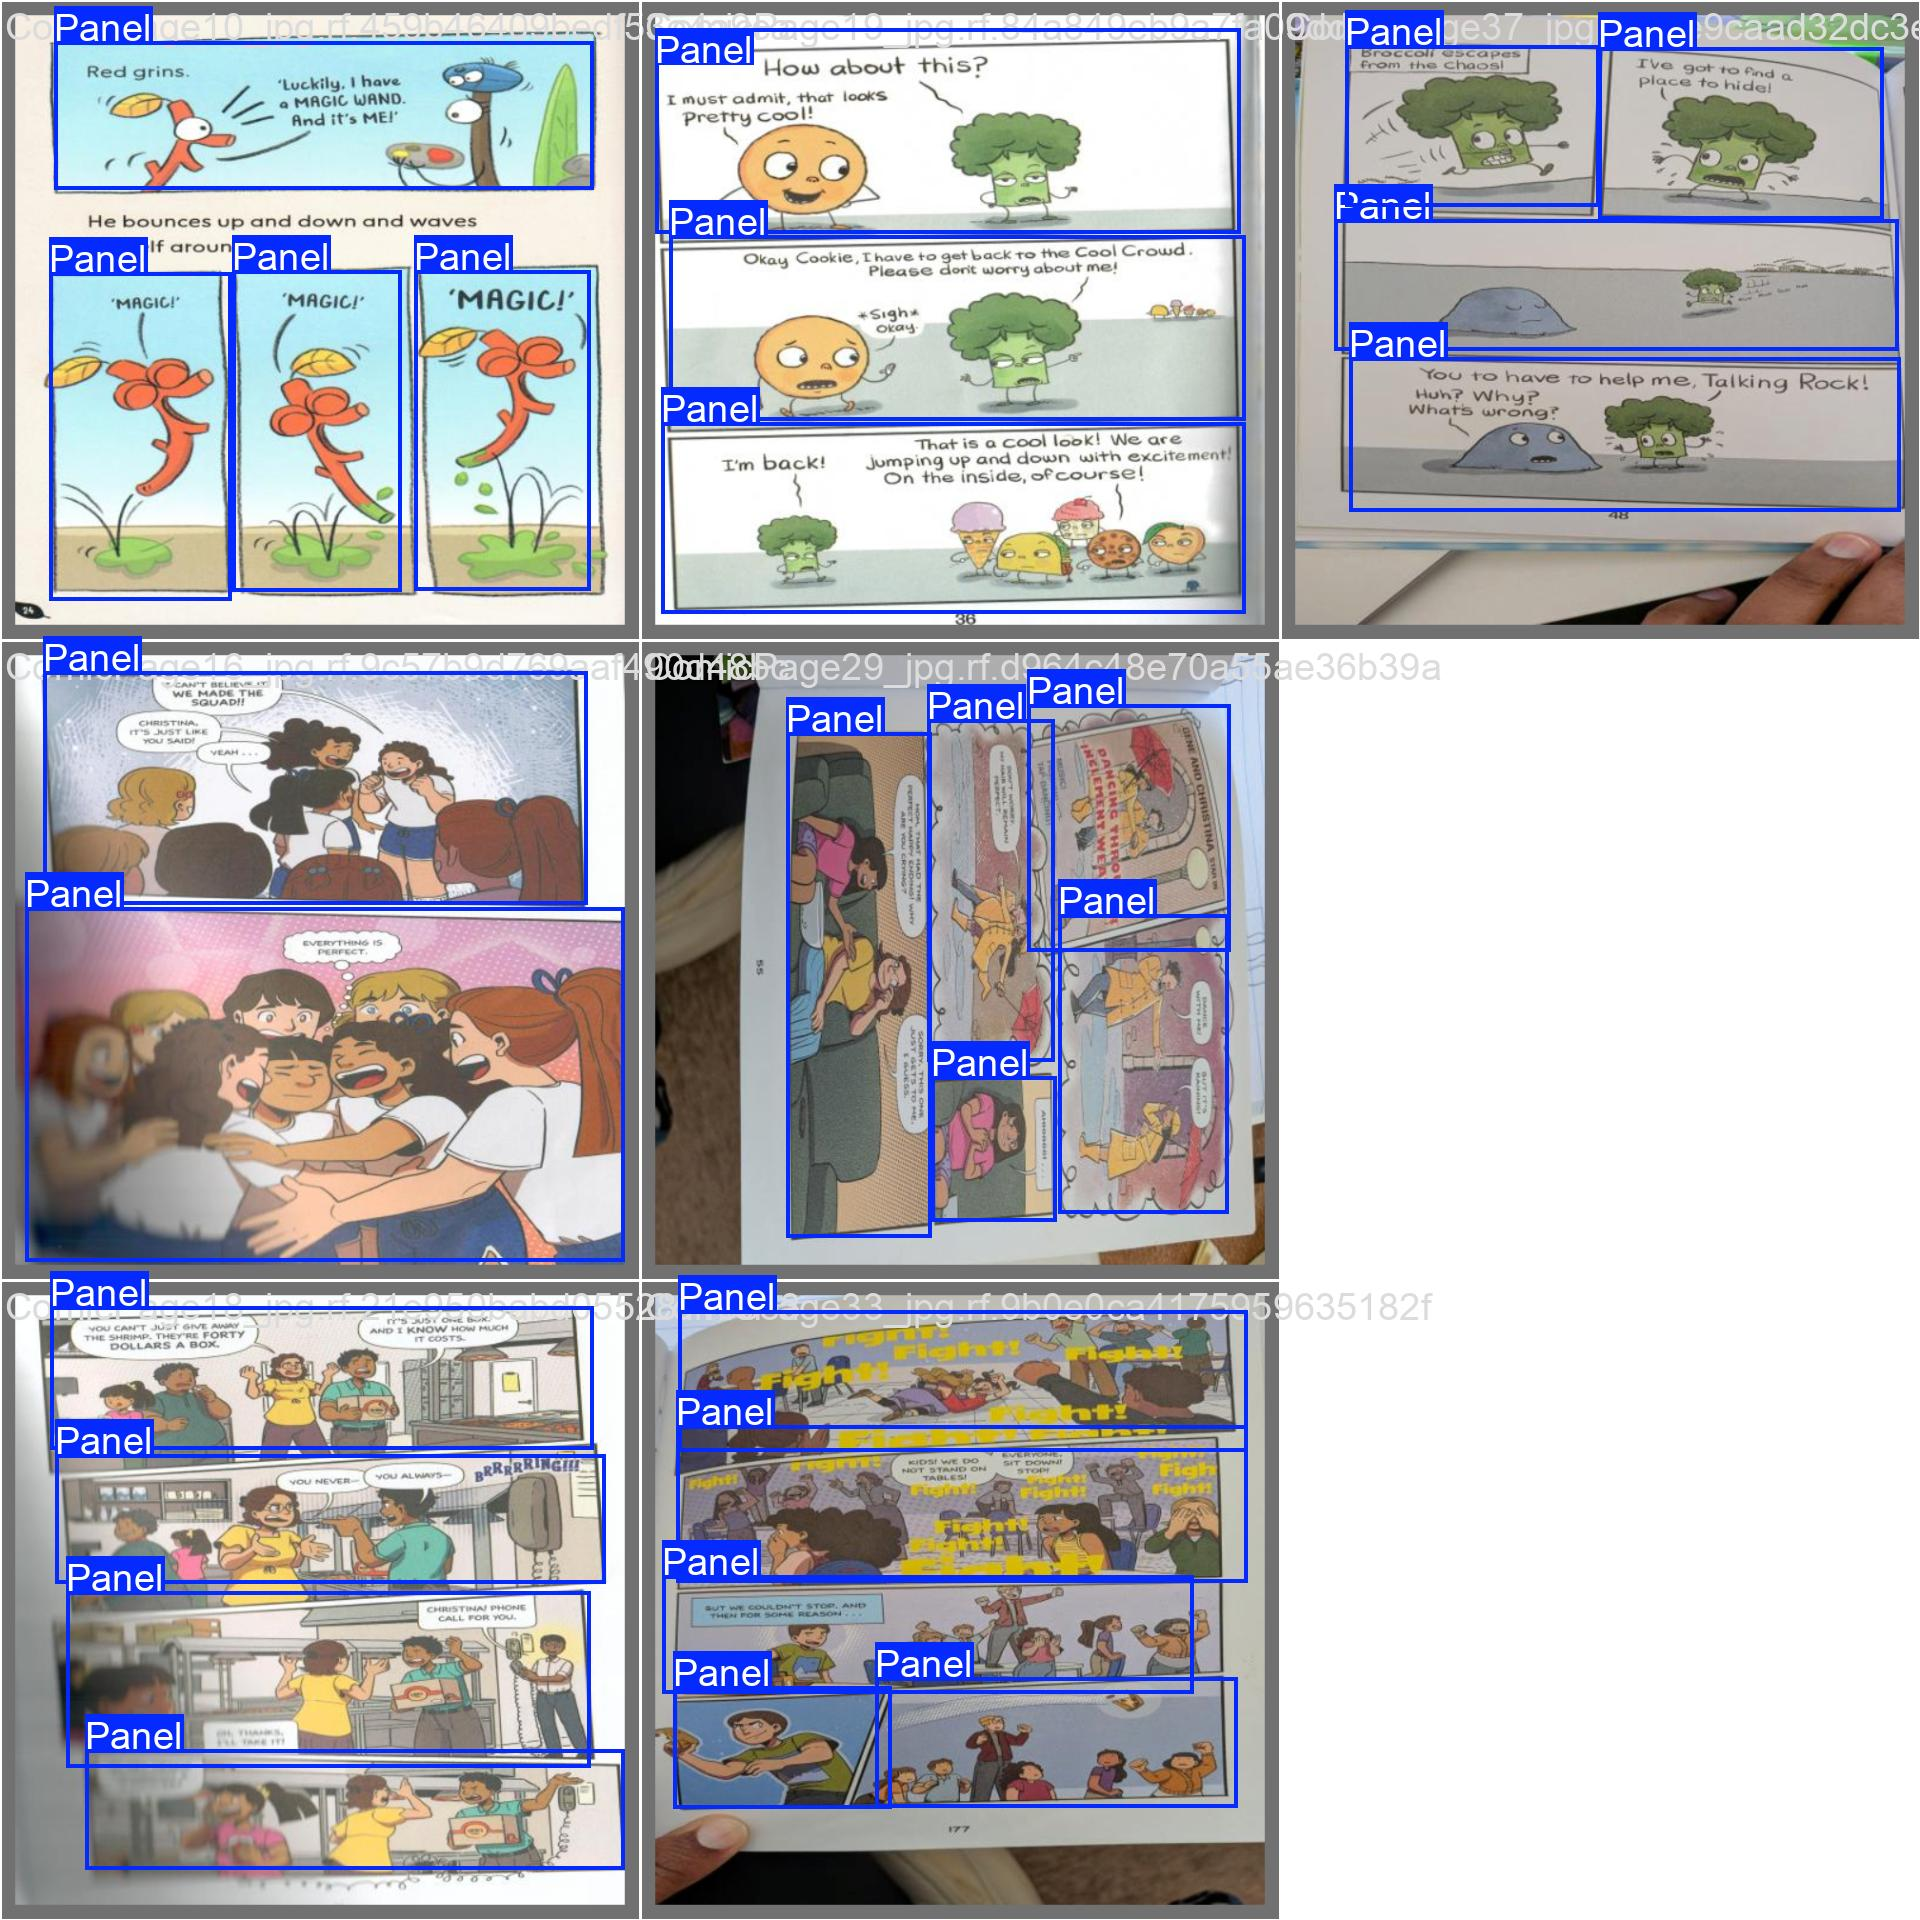

In [14]:
from IPython.display import Image as IPyImage
print("Validation Labels: ")
IPyImage(filename='/kaggle/working/runs/detect/ComicPanelUsingYOLO/finetuning/val_batch0_labels.jpg', width=600)

In [15]:
# predict using the new fine tuned model

import os
import random

# Image directory
image_dir = f"{dataset.location}/test/images"
files = os.listdir(image_dir)

# Filter only image files (optional, based on file extensions like .jpg, .png, etc.)
image_files = [f for f in files if f.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly pick an image file
input_image_name = random.choice(image_files)
input_image_path = os.path.join(image_dir, input_image_name)

# Run inference with YOLO 
results = model.predict(source=input_image_path, save=True, project='ComicPanelUsingYOLO', name='prediction')

# Get data from the first prediction result
print(f"orig_shape: {results[0].orig_shape}")
output_image = results[0].orig_img
output_image_dir = results[0].save_dir
input_image_path = results[0].path

# Output paths
print(f"output_image_dir: {output_image_dir}")
print(f"input_image_path: {input_image_path}")
print(f"results: {results}")
print(f"Saved to: f{os.path.join(output_image_dir, input_image_name)}")


image 1/1 /kaggle/working/datasets/My-First-Project-2/test/images/ComicPage31_jpg.rf.8b0bc2832a7ea4d8417f95624498e6e7.jpg: 640x640 7 Panels, 83.9ms
Speed: 4.9ms preprocess, 83.9ms inference, 21.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/ComicPanelUsingYOLO/prediction
orig_shape: (512, 512)
output_image_dir: /kaggle/working/runs/detect/ComicPanelUsingYOLO/prediction
input_image_path: /kaggle/working/datasets/My-First-Project-2/test/images/ComicPage31_jpg.rf.8b0bc2832a7ea4d8417f95624498e6e7.jpg
results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Panel'}
obb: None
orig_img: array([[[119, 129, 139],
        [147, 157, 167],
        [175, 185, 195],
        ...,
        [211, 201, 194],
        [158, 150, 143],
        [164, 156, 149]],

       [[158, 168, 178],
        [149, 159, 169],
        [162, 172, 182],
        ...,
        [

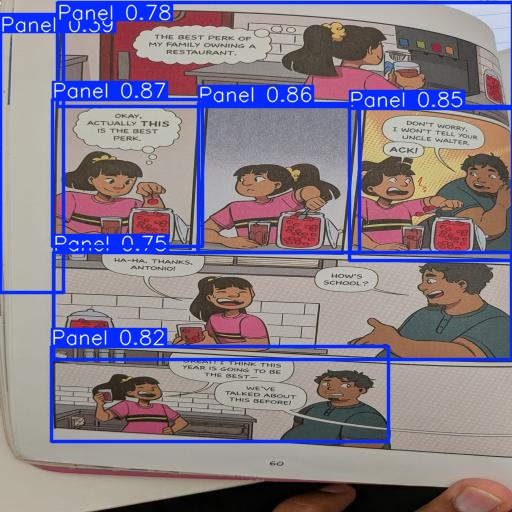

In [16]:
# show the predicted image
output_image_path ='/kaggle/working/runs/detect/ComicPanelUsingYOLO/prediction/ComicPage31_jpg.rf.8b0bc2832a7ea4d8417f95624498e6e7.jpg'
IPyImage(filename=output_image_path, width=600)